**AHMAD TARMIDZI**

## 1: Import Libraries

In [42]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2: Load Data

In [43]:
df = pd.read_csv('scenario_1.csv')

## 3: Summary Statistics

In [44]:
top5rows = df.head()
print(top5rows)
df.info()
df.describe().transpose()

summary = df.describe()
print(summary)


   PassengerId  Survived Pclass  \
0            1         0    3rd   
1            2         1    1st   
2            3         1    3rd   
3            4         1    1st   
4            5         0    3rd   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<class '

## 4: Data Cleaning

### 4.3: Dropping Feature Columns

In [45]:

df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)


### 4.4: Imputation of Missing Data

In [46]:

#displaying dataset
datatype = df.dtypes
print(datatype)

df = df.dropna()
df.head()

df.isnull().sum()


Survived      int64
Pclass       object
Sex          object
Age         float64
dtype: object


Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

## 5: Dealing with Categorical Data

In [47]:
#changing object to numeric
df['Pclass'] = df['Pclass'].replace(["1st", "2nd", "3rd"], [1, 2, 3])
df['Sex'] = df['Sex'].replace(["male", "female"], [0,1])

datatype = df.dtypes
print(datatype)

df = df.dropna()
df.head()

Survived      int64
Pclass        int64
Sex           int64
Age         float64
dtype: object


,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


## 6: Exploratory Data Analysis

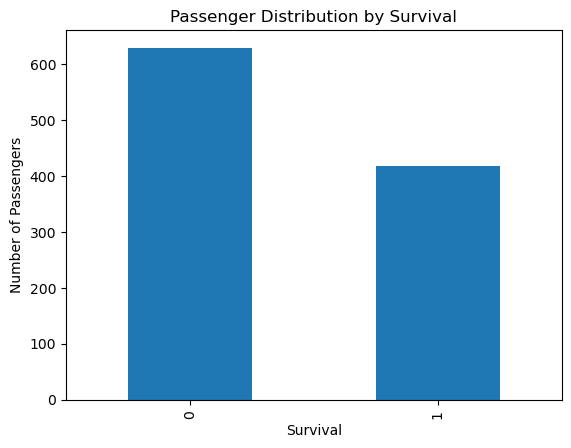

In [48]:
# Check distribution of target (barchart)
df['Survived'].value_counts().plot(kind='bar')
plt.title('Passenger Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.show()

<Axes: >

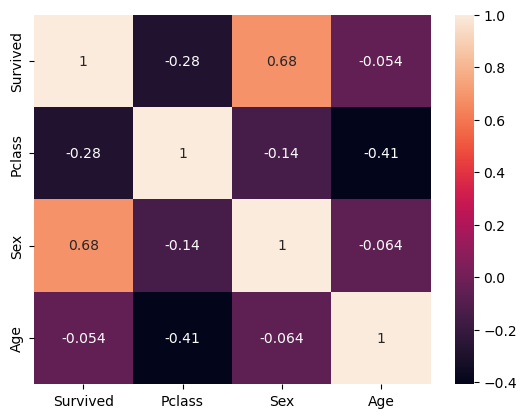

In [49]:
#creating heatmap

sns.heatmap(df.corr(),annot=True)

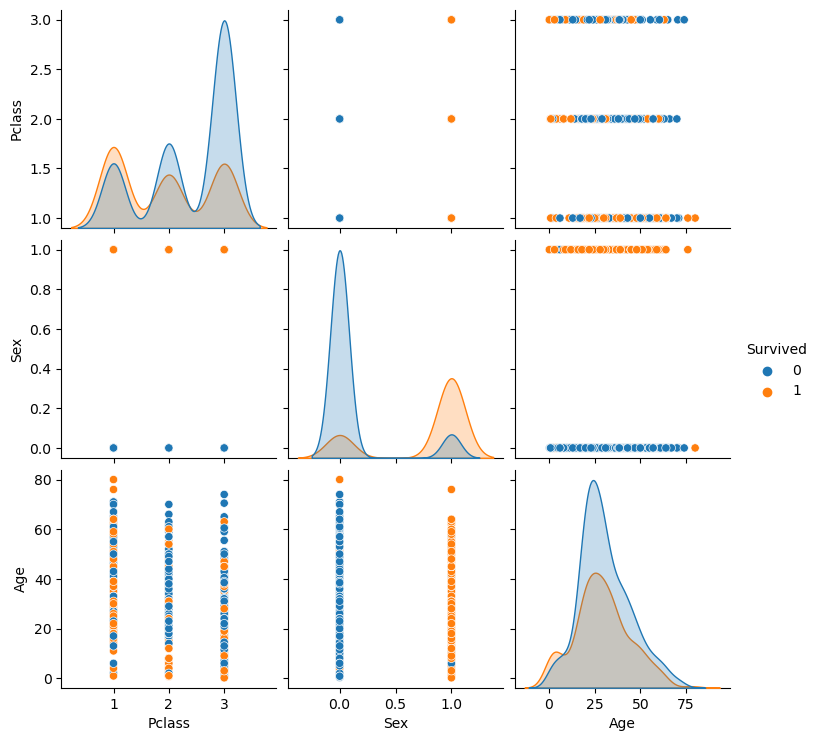

In [50]:
#create pairplot

sns.pairplot(df,hue='Survived')

## 7: Split Dataset

In [51]:
# Train test split to get the test dataset
X = df.drop('Survived',axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_eval, x_other, y_eval, y_other = train_test_split(X_test, y_test, test_size=0.5, random_state=101)




## 8: Normalise Dataset

In [52]:
# Normalise train dataset
scaler = StandardScaler()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

## 9: $M_0$ Model (Baseline)

In [53]:
# Create model
from sklearn.linear_model import LogisticRegressionCV

In [54]:
# Train model
log_model = LogisticRegressionCV()
log_model.fit(X_train,y_train)

print(log_model.coef_)


[[-0.86845131  1.71959556 -0.38240708]]


In [55]:
# Validate model
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred = log_model.predict(X_test)
confusion_matrix(y_test,y_pred)



array([[164,  29],
       [ 24,  97]], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       193
           1       0.77      0.80      0.79       121

    accuracy                           0.83       314
   macro avg       0.82      0.83      0.82       314
weighted avg       0.83      0.83      0.83       314



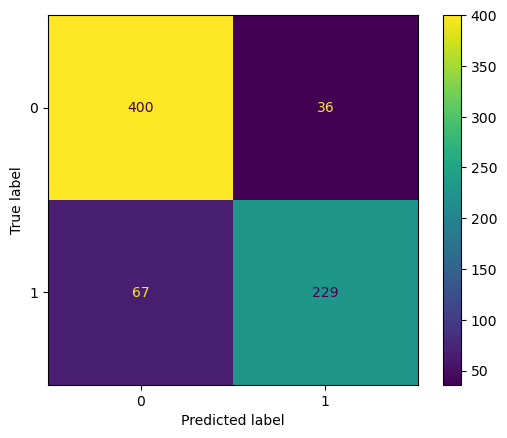

In [56]:
# Evaluate model
ConfusionMatrixDisplay.from_estimator(log_model,X_train,y_train)
print(classification_report(y_test,y_pred))

## 10: $M_1$ Model

In [57]:
# Create model
from sklearn.model_selection import train_test_split 

In [59]:
# Validate model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_eval,y_eval)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=28))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=28),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 28,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [60]:
# Evaluate model
pred = full_cv_classifier.predict(X_eval)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_eval,pred)
print(classification_report(y_eval,pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        99
           1       0.77      0.81      0.79        58

    accuracy                           0.84       157
   macro avg       0.83      0.83      0.83       157
weighted avg       0.84      0.84      0.84       157



## 11: Analysis

In [61]:
pred = full_cv_classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       193
           1       0.78      0.80      0.79       121

    accuracy                           0.84       314
   macro avg       0.83      0.83      0.83       314
weighted avg       0.84      0.84      0.84       314

